In [ ]:
import warnings
import pandas as pd
warnings.filterwarnings("ignore")
import logging
logging.disable(logging.CRITICAL)

In [ ]:
!pip install tensorflow

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
df = pd.read_csv('/content/drive/MyDrive/UU/BTC-USD (BaoCao).csv')
df = df.groupby('Date').sum()

In [31]:
!pip install keras

In [32]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-03-01,3853.757080,3907.795410,3851.692383,3859.583740,3859.583740,7661247975
2019-03-02,3855.318115,3874.607422,3832.127930,3864.415039,3864.415039,7578786076
2019-03-03,3862.266113,3875.483643,3836.905762,3847.175781,3847.175781,7253558152
2019-03-04,3845.091553,3867.381836,3733.749756,3761.557129,3761.557129,9029175788
2019-03-05,3759.832520,3903.916748,3745.183105,3896.375000,3896.375000,10174126415
...,...,...,...,...,...,...
2024-05-28,69392.195313,69514.640625,67227.156250,68296.218750,68296.218750,32722265965
2024-05-29,68296.351563,68852.460938,67101.492188,67578.093750,67578.093750,26707072906
2024-05-30,67576.085938,69500.539063,67118.078125,68364.992188,68364.992188,29509712534


In [33]:
import numpy as np
data = df[['Close']]
# Convert the dataframe to a numpy array
dataset = data.values
training_data_len = int(np.ceil( len(dataset) * .9 ))
dataset

array([[ 3859.58374 ],
       [ 3864.415039],
       [ 3847.175781],
       ...,
       [68364.992188],
       [67491.414063],
       [67706.9375  ]])

In [34]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00141408],
       [0.00148377],
       [0.00123509],
       ...,
       [0.93193342],
       [0.91933166],
       [0.92244068]])

In [35]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

# we use 60 days ahead for forecasting range
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.00141408, 0.00148377, 0.00123509, 0.        , 0.00194481,
       0.00205397, 0.00216277, 0.00201342, 0.00291043, 0.00274145,
       0.00207251, 0.00212918, 0.002094  , 0.00234864, 0.00287577,
       0.00414254, 0.00380358, 0.00390858, 0.0044666 , 0.00470153,
       0.0038627 , 0.0037854 , 0.00395646, 0.00375943, 0.00290692,
       0.00322443, 0.00469561, 0.00443655, 0.00485874, 0.00497827,
       0.00496015, 0.00572151, 0.01613228, 0.01747592, 0.01675143,
       0.01839423, 0.01872798, 0.02073427, 0.02204517, 0.02082171,
       0.0225469 , 0.01879536, 0.01915673, 0.01925839, 0.02028456,
       0.01883316, 0.02126314, 0.02149941, 0.02216944, 0.02224772,
       0.02273925, 0.02240235, 0.02362611, 0.02612167, 0.024571  ,
       0.02090187, 0.02189481, 0.02173531, 0.02197835, 0.02143326])]
[0.022924479150234697]

[array([0.00141408, 0.00148377, 0.00123509, 0.        , 0.00194481,
       0.00205397, 0.00216277, 0.00201342, 0.00291043, 0.00274145,
       0.00207251, 0.00212918, 0.0

<Axes: xlabel='Date'>

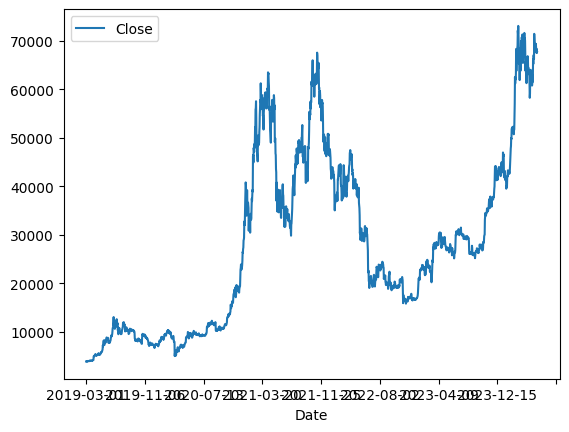

In [36]:
data.plot()

In [37]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)


1668/1668 [==============================] - 128s 70ms/step - loss: 0.0017


In [38]:
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predictions = model.predict(x_test)

6/6 [==============================] - 1s 39ms/step


In [39]:
# Inverse scaling to get predictions in original scale
predictions = scaler.inverse_transform(predictions)

In [40]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

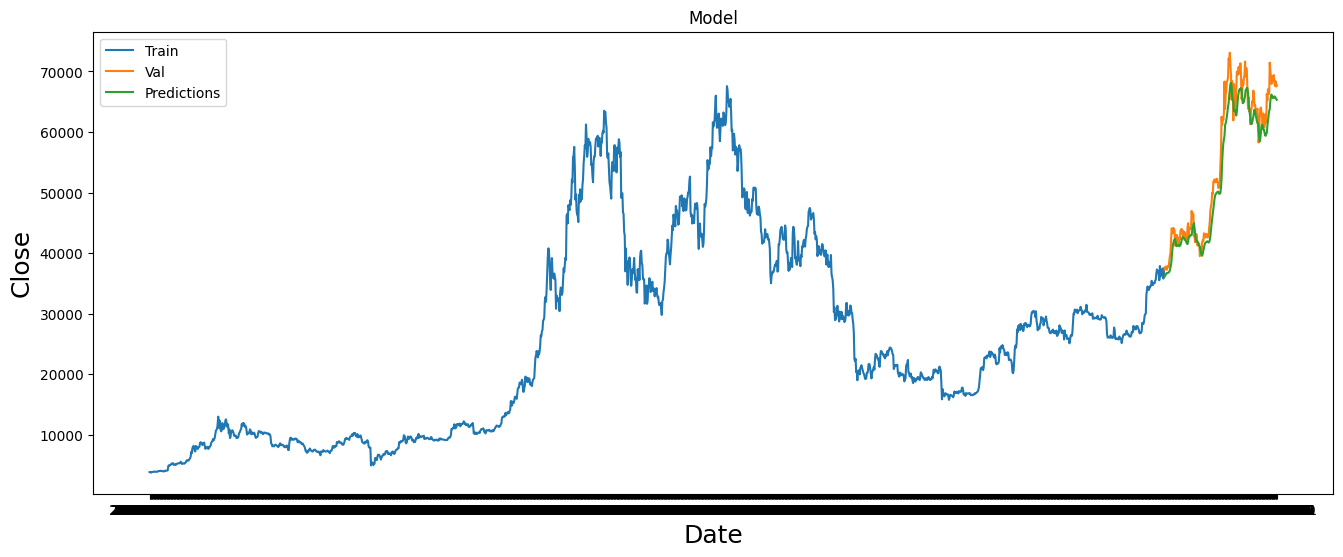

In [42]:
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='upper left')
plt.show()